In [1]:
#import dependencies
import statsmodels.api as sm
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

%matplotlib inline

In [10]:
#weekly gas prices in San Francisco Area
#read csv 
weekly_gas_prices = pd.read_csv("Resources/weekly_gas_prices_ca_2.csv")

#rename column 
#weekly_gas_prices = weekly_gas_prices.rename(columns={'Weekly San Francisco All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)':'Price'})

#preview data
weekly_gas_prices.head()

weekly_gas_prices = weekly_gas_prices.set_index("Date")
weekly_gas_prices = weekly_gas_prices.dropna()
weekly_gas_prices_1314 = weekly_gas_prices.loc["2013-09-06":"2014-09-08",:]
weekly_gas_prices_1314.count()

Price    52
dtype: int64

In [3]:
#weekly_gas_prices.index

In [4]:
#save the gas price values into a list
gas_array = weekly_gas_prices_1314["Price"].values
gas_list = np.ndarray.tolist(gas_array)
len(gas_list)

52

In [17]:
#connect to Google
pytrends = TrendReq(hl='en-US', tz=360)

In [18]:
#set search parameter to 'Tesla'
kw_list = ['Tesla']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-09 2014-09-09', geo='US-CA',gprop='')

In [19]:
#import tesla google searches over time
tesla_searches = pytrends.interest_over_time()
tesla_searches_1314 = tesla_searches.iloc[0:52,:]
tesla_searches_1314.head()

,Tesla,isPartial
date,,
2013-09-15,69,False
2013-09-22,70,False
2013-09-29,100,False
2013-10-06,68,False
2013-10-13,65,False


In [20]:
#append Tesla google search popularity to a list
tesla_array = tesla_searches_1314["Tesla"].values
tesla_list = np.ndarray.tolist(tesla_array)
len(tesla_list)

52

In [23]:
#set parameter to 'Electric car'
kw_list = ['Electric car']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-09 2014-09-09', geo='US-CA',gprop='')

In [24]:
#import Electric car Google searches over time
ecar_searches = pytrends.interest_over_time()
ecar_searches_1314 = ecar_searches.iloc[0:52,:]
ecar_searches_1314.head()

,Electric car,isPartial
date,,
2013-09-15,98,False
2013-09-22,94,False
2013-09-29,93,False
2013-10-06,67,False
2013-10-13,83,False


In [25]:
#append Electric car google search popularity to a list
ecar_array = ecar_searches_1314["Electric car"].values
ecar_list = np.ndarray.tolist(ecar_array)
len(ecar_list)

52

In [26]:
#set parameter to 'Prius'
kw_list = ['Prius']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-09 2014-09-09', geo='US-CA',gprop='')

In [27]:
#import Prius Google searches over time
prius_searches = pytrends.interest_over_time()
prius_searches_1314 = prius_searches.iloc[0:52,:]
prius_searches_1314.head()

,Prius,isPartial
date,,
2013-09-15,81,False
2013-09-22,76,False
2013-09-29,79,False
2013-10-06,83,False
2013-10-13,78,False


In [28]:
#append Prius Google search popularity to a list
prius_array = prius_searches_1314["Prius"].values
prius_list = np.ndarray.tolist(prius_array)
len(prius_list)

52

In [29]:
comparison_df = weekly_gas_prices_1314.assign(Tesla = tesla_list, Electric_Cars = ecar_list, Prius = prius_list)

comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2013-09-16,4.096,69,98,81
2013-09-23,4.052,70,94,76
2013-09-30,3.980,100,93,79
2013-10-07,3.898,68,67,83
2013-10-14,3.840,65,83,78


In [30]:
comparison_df['Price'] = comparison_df['Price']*10

comparison_df.head()


,Price,Tesla,Electric_Cars,Prius
Date,,,,
2013-09-16,40.96,69,98,81
2013-09-23,40.52,70,94,76
2013-09-30,39.80,100,93,79
2013-10-07,38.98,68,67,83
2013-10-14,38.40,65,83,78


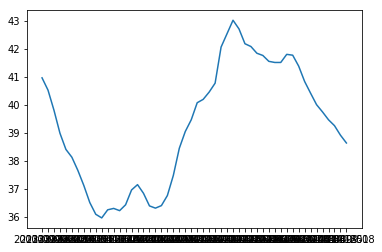

In [31]:
Price_df = comparison_df["Price"]

plt.plot(Price_df)

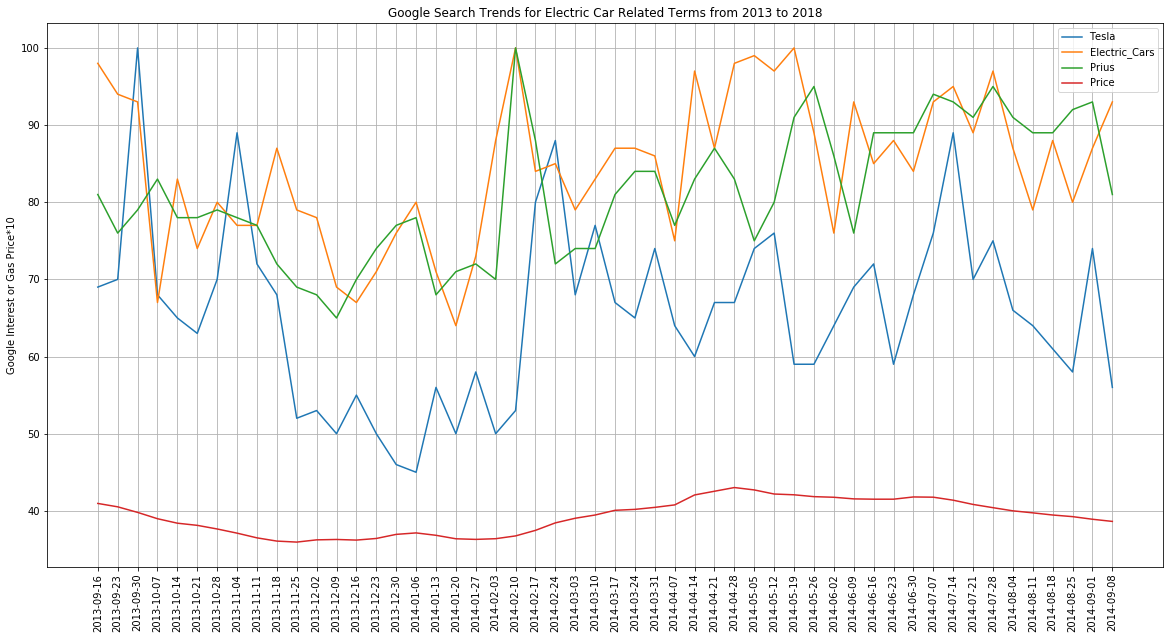

In [32]:
plt.figure(figsize=(20,10))
plt.plot(comparison_df["Tesla"])
plt.plot(comparison_df["Electric_Cars"])
plt.plot(comparison_df["Prius"])
plt.plot(comparison_df["Price"])
plt.title("Google Search Trends for Electric Car Related Terms from 2013 to 2018")
plt.ylabel("Google Interest or Gas Price*10")
plt.xticks(rotation=90)
plt.legend()
#plt.savefig("Images/1314/trends_gasprice_comparison.png")
plt.grid()
plt.show()

In [33]:
#do a rolling average over the 5-year trends data to normalize the spikes for a better visual

from numpy import convolve
 
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

rolling_prius = movingaverage(prius_list,5)

rolling_ecar = movingaverage(ecar_list,5)

rolling_tesla = movingaverage(tesla_list, 5)

In [34]:
#remove first value from gas_list so there are the same amt of values

weekly_gas_prices_rolled = weekly_gas_prices_1314.iloc[4:]
weekly_gas_prices_rolled.head()

,Price
Date,
2013-10-14,3.840
2013-10-21,3.812
2013-10-28,3.765
2013-11-04,3.711
2013-11-11,3.650


In [35]:
#save the gas price values into a list
rolled_gas_array = weekly_gas_prices_rolled["Price"].values
rolled_gas_list = np.ndarray.tolist(rolled_gas_array)
len(rolled_gas_list)

48

In [36]:
rolling_comparison_df = weekly_gas_prices_rolled.assign(Tesla = rolling_tesla, Electric_Cars = rolling_ecar, Prius = rolling_prius)

rolling_comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2013-10-14,3.840,74.4,87.0,79.4
2013-10-21,3.812,73.2,82.2,78.8
2013-10-28,3.765,73.2,79.4,79.4
2013-11-04,3.711,71.0,76.2,79.2
2013-11-11,3.650,71.8,78.2,78.0


In [37]:
rolling_comparison_df['Price'] = rolling_comparison_df['Price']*10
rolling_comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2013-10-14,38.40,74.4,87.0,79.4
2013-10-21,38.12,73.2,82.2,78.8
2013-10-28,37.65,73.2,79.4,79.4
2013-11-04,37.11,71.0,76.2,79.2
2013-11-11,36.50,71.8,78.2,78.0


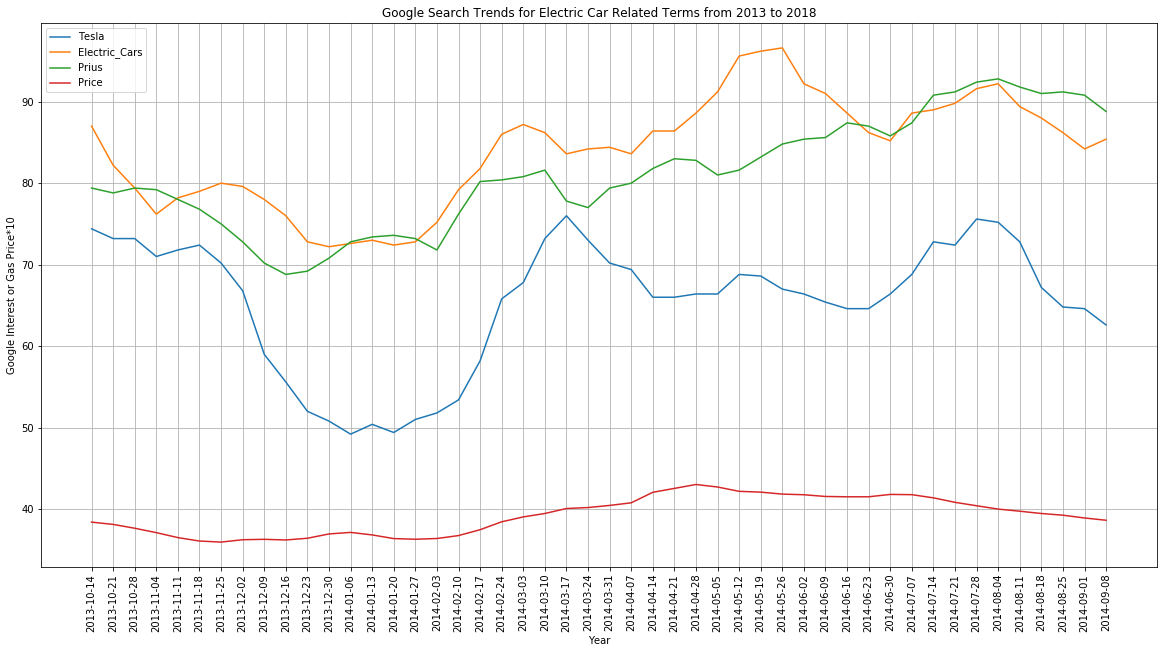

In [38]:
plt.figure(figsize=(20,10))
plt.plot(rolling_comparison_df["Tesla"])
plt.plot(rolling_comparison_df["Electric_Cars"])
plt.plot(rolling_comparison_df["Prius"])
plt.plot(rolling_comparison_df["Price"])

plt.title("Google Search Trends for Electric Car Related Terms from 2013 to 2018")
plt.xlabel("Year")
plt.ylabel("Google Interest or Gas Price*10")
plt.legend()
plt.xticks(rotation=90)
#plt.savefig("Images/1314/trends_gasprice_rollingcomparison.png")
plt.grid()
plt.show()

In [39]:
#STATISTICAL ANALYSIS

#compare gas price line (independant variable) with each google search result (dependent variables)

#OPTION 1: Create scatter plot for x=gas price y=trend
#          Calculate line of best fit
#          Try it with Prius first

In [40]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(rolled_gas_list, rolling_prius)



In [41]:
print("y=", slope, "* x +", intercept)
print("   ")
print("r-squared:", r_value**2)
print("r-value:", r_value)
print("p-value:", p_value)
print("standard error:", std_err)

y= 19.990233808411244 * x + 2.728302596486458
   
r-squared: 0.44129885503874483
r-value: 0.6643032854342547
p-value: 2.6312068971795106e-07
standard error: 3.3163651157300325


Text(0,0.5,'Google Searches')

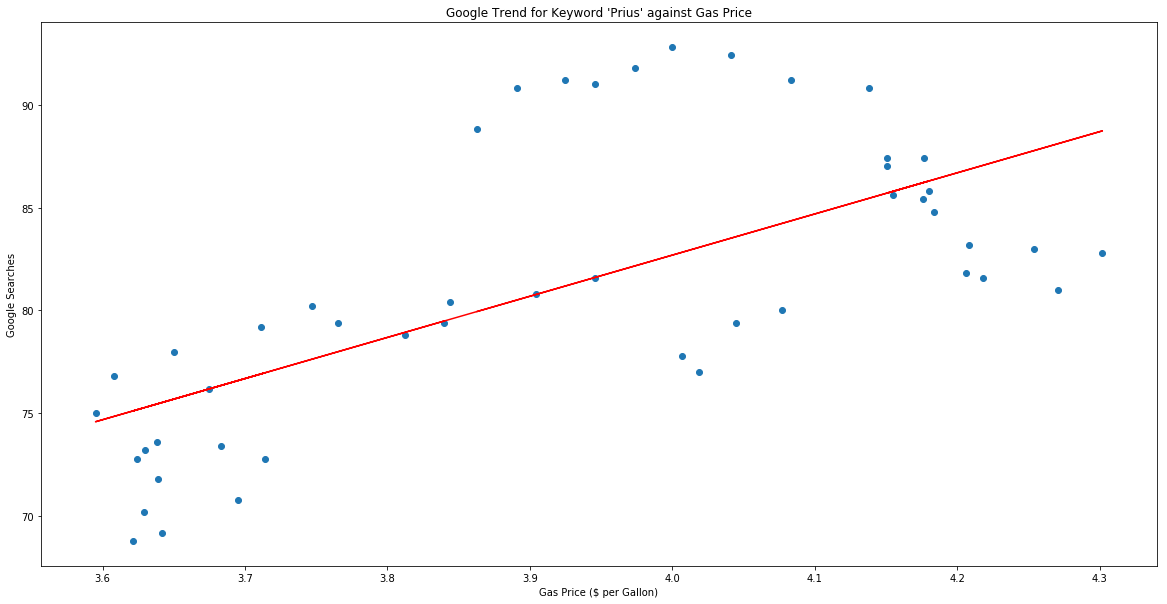

In [42]:
#scatter plot of gas prices v. prius searches

plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_prius, alpha=1)
plt.plot(rolled_gas_list, intercept + slope*(rolling_comparison_df["Price"] / 10), 'r', label='fitted line')
plt.title("Google Trend for Keyword 'Prius' against Gas Price")
plt.xlabel("Gas Price ($ per Gallon)")
plt.ylabel("Google Searches")
#plt.savefig("Images/1314/gasprice_rollingprius_scatter.png")

In [43]:
#try shifting prius data by subtracting 2 from front of list; subtract two from back of gas list to match value counts


In [44]:
slope, intercept, r_value, p_value, std_err = stats.linregress(rolled_gas_list, rolling_ecar)


In [45]:
print("y=", slope, "* x +", intercept)
print("   ")
print("r-squared:", r_value**2)
print("r-value:", r_value)
print("p-value:", p_value)
print("standard error:", std_err)

y= 24.881164369153073 * x + -13.59538994063631
   
r-squared: 0.7064054598338763
r-value: 0.840479303632086
p-value: 7.910275867683215e-14
standard error: 2.3650414044504924


Text(0,0.5,'Google Searches')

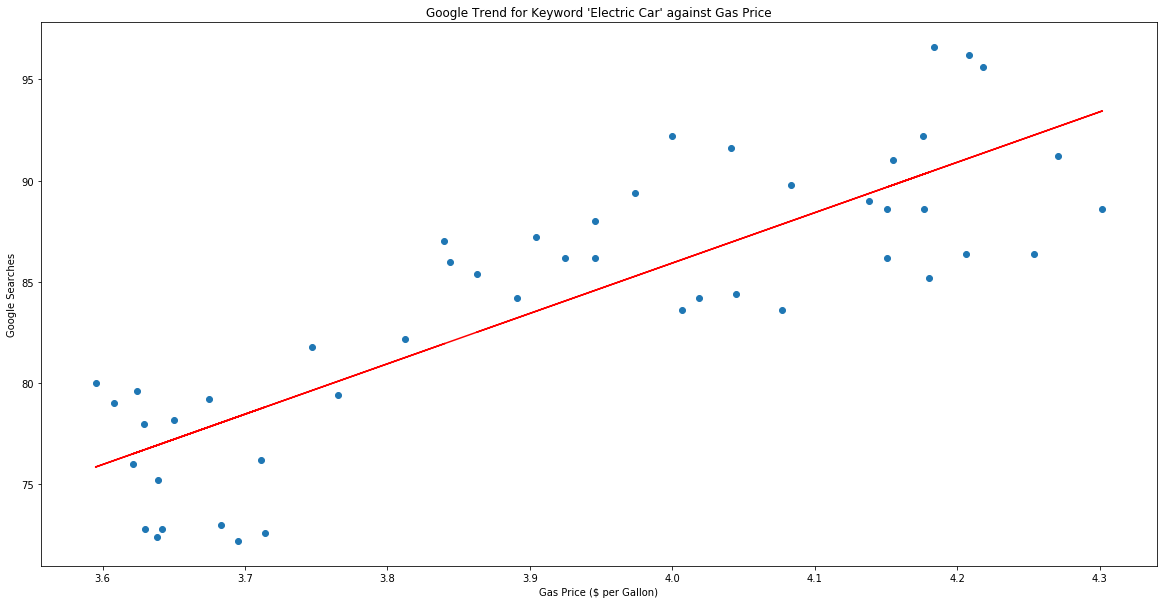

In [46]:
plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_ecar, alpha=1)
plt.plot(rolled_gas_list, intercept + slope*(rolling_comparison_df["Price"] / 10), 'r', label='fitted line')
plt.title("Google Trend for Keyword 'Electric Car' against Gas Price")
plt.xlabel("Gas Price ($ per Gallon)")
plt.ylabel("Google Searches")
#plt.savefig("Images/1314/gasprice_rollingecar_scatter.png")

In [47]:

slope, intercept, r_value, p_value, std_err = stats.linregress(rolled_gas_list, rolling_tesla)


In [48]:
print("y= (", slope, "* x) +", intercept)
print("   ")
print("r-squared:", r_value**2)
print("r-value:", r_value)
print("p-value:", p_value)
print("standard error:", std_err)

y= ( 15.934441022035955 * x) + 2.9766195799509063
   
r-squared: 0.21149692823403368
r-value: 0.4598879518252611
p-value: 0.001006991693922305
standard error: 4.536360706509781


Text(0,0.5,'Google Searches')

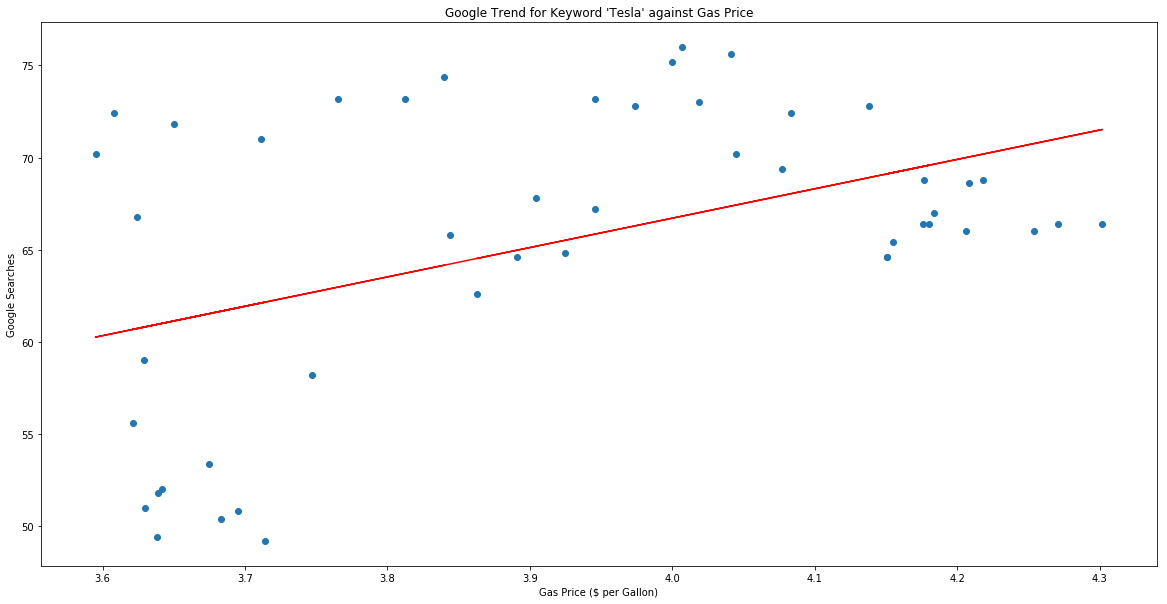

In [49]:
plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_comparison_df["Tesla"], alpha=1)
plt.plot(rolled_gas_list, intercept + slope*(rolling_comparison_df["Price"] / 10), 'r', label='fitted line')
plt.title("Google Trend for Keyword 'Tesla' against Gas Price")
plt.xlabel("Gas Price ($ per Gallon)")
plt.ylabel("Google Searches")
#plt.savefig("Images/1314/gasprice_rollingtesla_scatter.png")